<a href="https://colab.research.google.com/github/AHamamd150/ML_Course_BUE/blob/main/BUE_2024/codes/CNN_fashinMNIST_with_GradCaM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm
from keras.datasets import mnist, fashion_mnist,cifar10
from tensorflow.keras.utils import plot_model
import sklearn
from keras import backend as K # The backend is important while we are dealing with keras layers and the basic low level operation cannot be handeled by numpy
from keras.losses import mse, binary_crossentropy,CategoricalCrossentropy
from tqdm import tqdm
import random
# Import all the required Libraries
from sklearn.metrics import  roc_curve,auc
import tensorflow
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model, Sequential
from keras.layers import Dense, Conv2D, Dropout, BatchNormalization, Input, Reshape, Flatten,  Conv2DTranspose, MaxPooling2D, UpSampling2D
from tensorflow.keras import regularizers
import os



In [3]:
(x_train,y_train), (x_test,y_test) = fashion_mnist.load_data()
x_train = x_train[np.logical_or(y_train==1 , y_train==7)].astype('float32')/255.
y_train = y_train[np.logical_or(y_train==1 , y_train==7)]
x_test = x_test[np.logical_or(y_test==1 , y_test==7)].astype('float32')/255.
y_test = y_test[np.logical_or(y_test==1 , y_test==7)]

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
y_train[y_train==7] =y_train[y_train==7]*0.0
y_test[y_test==7] =y_test[y_test==7]*0.0

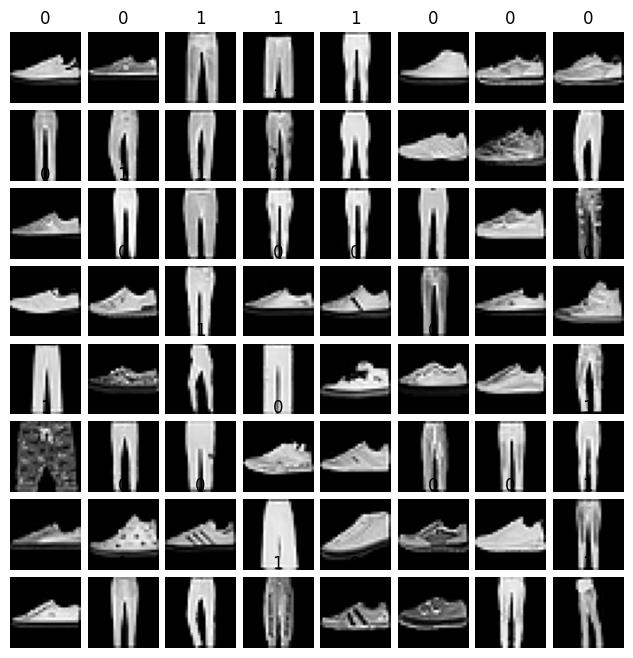

In [5]:
fig = plt.figure(figsize=(8,8))
plt.subplots_adjust(hspace = 0.1,wspace=0.0)
for q in range(64):
    fig.add_subplot(8,8,q+1)
    plt.imshow(x_train[q],cmap='gray');
    plt.title(y_train[q])
    plt.axis('off')

In [6]:
x_train = tf.expand_dims(x_train,axis=-1)
x_test = tf.expand_dims(x_test,axis=-1)
print(f'Dimensions of the training data=  {x_train.shape}')
print(f'Dimensions of the test data=  {x_test.shape}')

Dimensions of the training data=  (12000, 28, 28, 1)
Dimensions of the test data=  (2000, 28, 28, 1)


In [7]:
### CNN model

inp = Input((28,28,1))
e = Conv2D(16, (3, 3), activation='relu',name = 'Conv_1')(inp)
e = Conv2D(16, (3, 3), activation='relu',name = 'Conv_2')(e)
e = MaxPooling2D((2, 2),name = 'Pooling_1')(e)
e= Dropout(0.2)(e)
e = Conv2D(32, (3, 3), activation='relu',name = 'Conv_3')(e)
e = Conv2D(32, (3, 3), activation='relu',name = 'Conv_4')(e)
e = MaxPooling2D((2, 2),name = 'Pooling_2')(e)
e= Dropout(0.2)(e)
e = Flatten()(e)
e = Dense(128, activation='relu',name = 'FC_1')(e)
e= Dropout(0.2)(e)
x=  Dense(2, activation="softmax")(e)
cnn = Model(inp,x)
cnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 Conv_1 (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 Conv_2 (Conv2D)             (None, 24, 24, 16)        2320      
                                                                 
 Pooling_1 (MaxPooling2D)    (None, 12, 12, 16)        0         
                                                                 
 dropout (Dropout)           (None, 12, 12, 16)        0         
                                                                 
 Conv_3 (Conv2D)             (None, 10, 10, 32)        4640      
                                                                 
 Conv_4 (Conv2D)             (None, 8, 8, 32)          9248  

In [8]:
cnn.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.legacy.Adam(), metrics=['accuracy'])
history_cnn = cnn.fit(x_train, y_train, validation_split=0.15, epochs=4, batch_size=100,shuffle=False, verbose=1)


Epoch 1/4
102/102 [==============================] - 14s 119ms/step - loss: 0.0490 - accuracy: 0.9890 - val_loss: 1.4303e-04 - val_accuracy: 1.0000
Epoch 2/4
102/102 [==============================] - 12s 117ms/step - loss: 0.0026 - accuracy: 0.9993 - val_loss: 1.3401e-04 - val_accuracy: 1.0000
Epoch 3/4
102/102 [==============================] - 12s 116ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 4.1043e-05 - val_accuracy: 1.0000
Epoch 4/4
102/102 [==============================] - 11s 111ms/step - loss: 9.8350e-04 - accuracy: 0.9997 - val_loss: 8.3430e-05 - val_accuracy: 1.0000


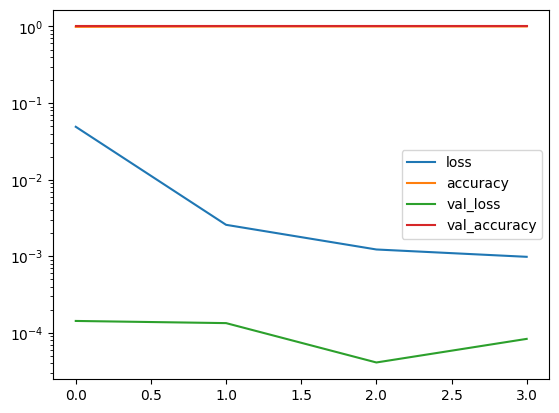

In [9]:
pd.DataFrame(history_cnn.history).plot(logy=True);

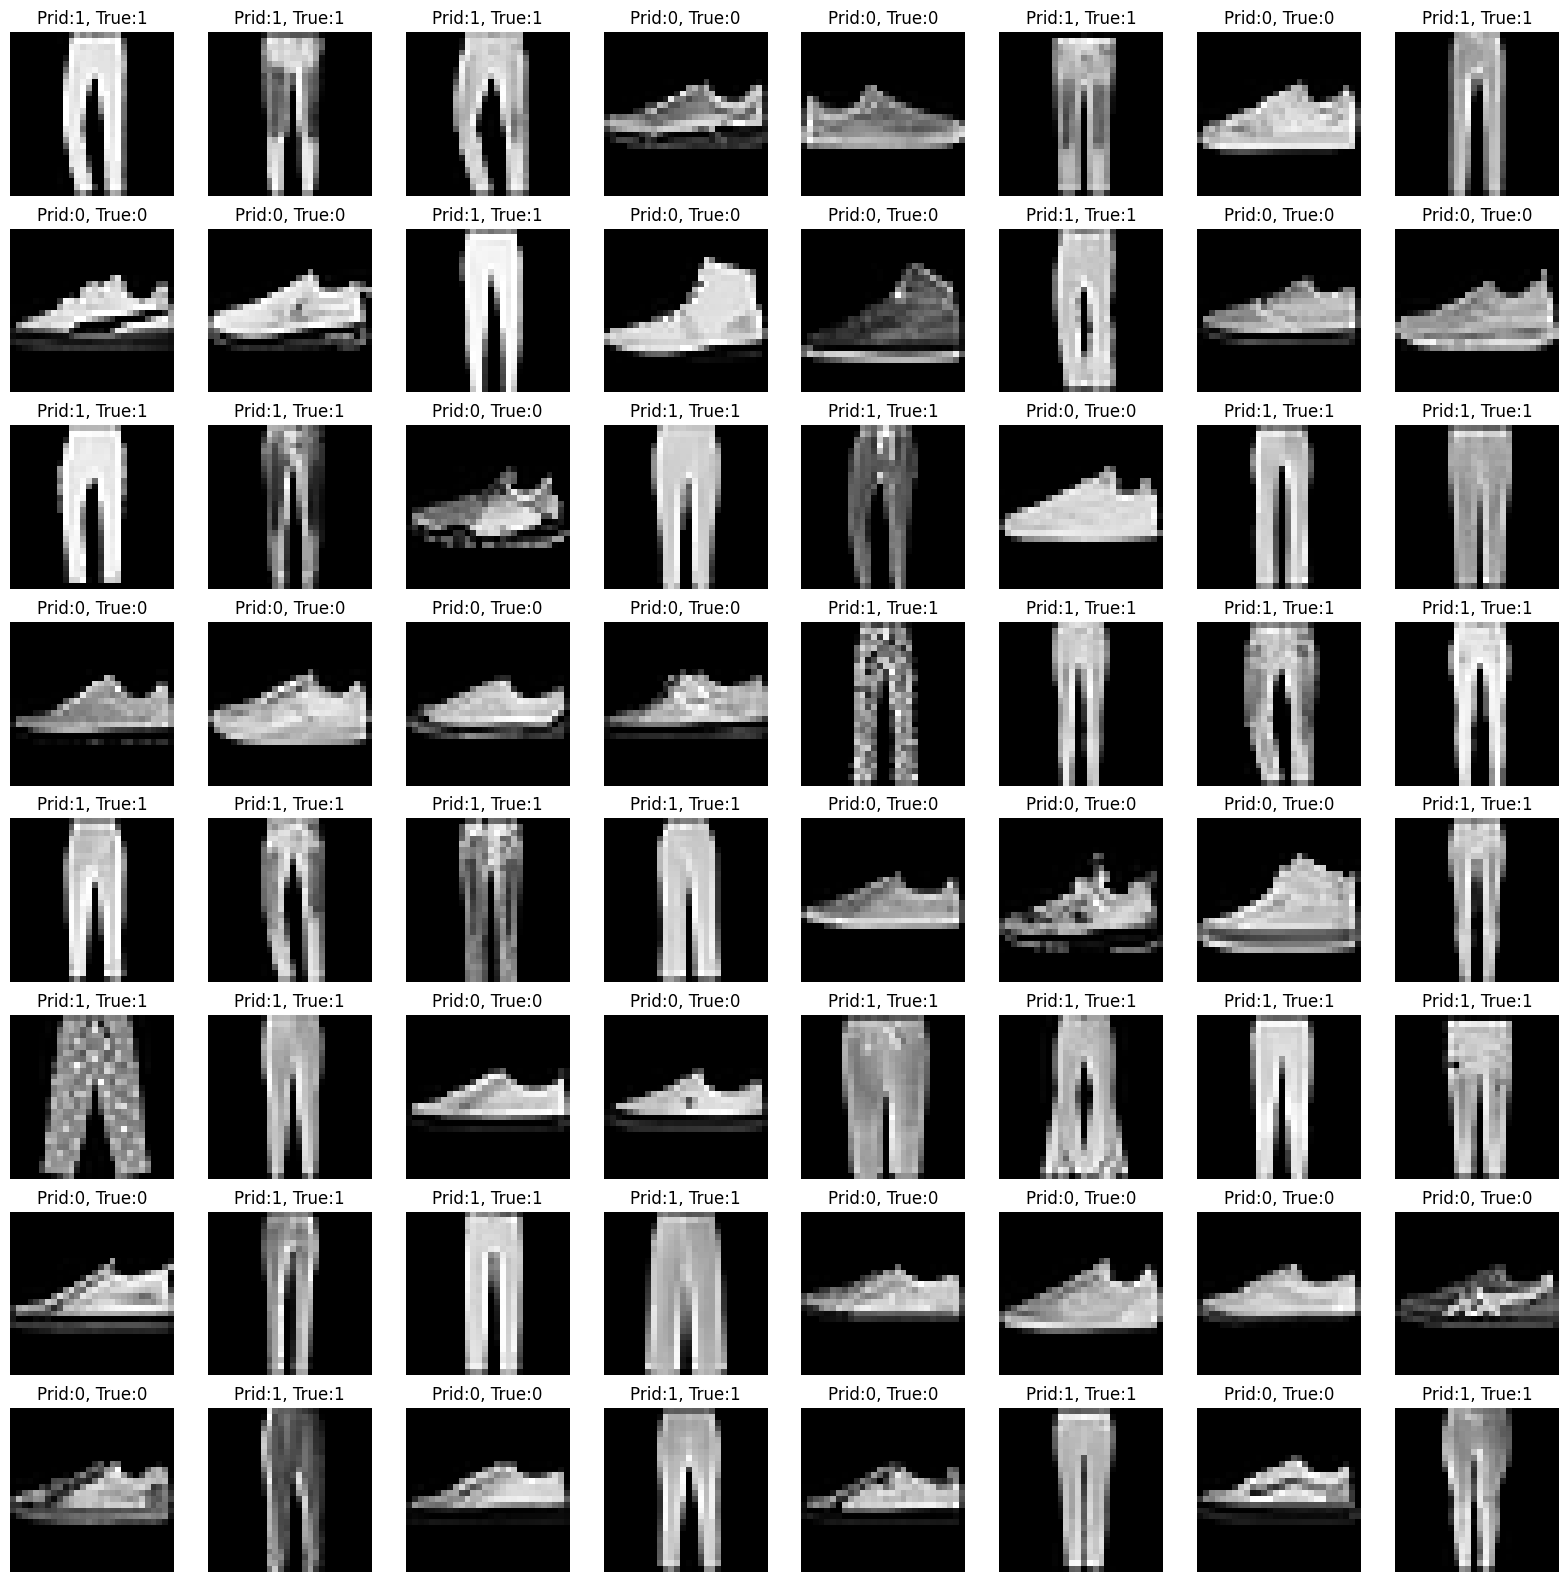

In [10]:
##### Do some predictions ####
fig = plt.figure(figsize=(20,20))
#plt.subplots_adjust(hspace = 0.1,wspace=0.0)
for q in range(64):
    fig.add_subplot(8,8,q+1)
    plt.imshow(x_test[q],cmap='gray');
    x1= cnn.predict(np.expand_dims(x_test[q],0),verbose=0)
    plt.title('Prid:'+str(np.argmax(x1))+', True:'+str(y_test[q]))
    plt.axis('off')


In [11]:
scores = cnn.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (cnn.metrics_names[1], scores[1]*100))

accuracy: 100.00%


In [12]:
score=cnn.predict(x_test);
fpr, tpr,_ =roc_curve(tf.keras.utils.to_categorical(y_test,2).ravel(),score.ravel());


63/63 [==============================] - 1s 10ms/step


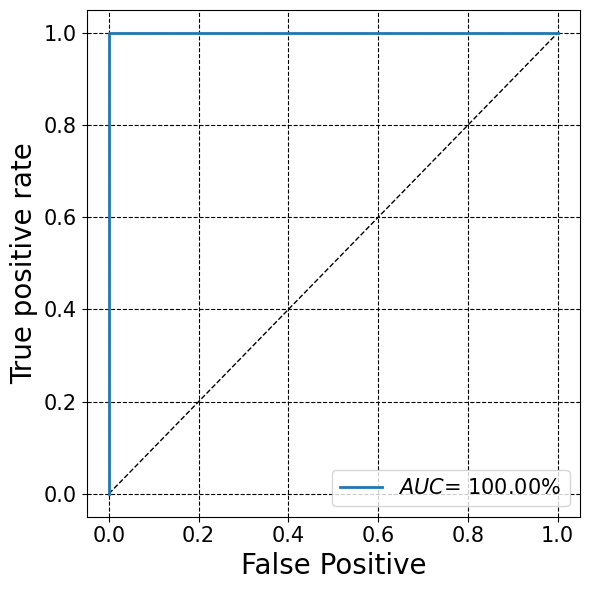

In [13]:
plt.figure(figsize=(6,6))
plt.plot([0,1],[0,1],'k--',linewidth=1);
plt.plot(fpr,tpr,linewidth=2,label=r'$AUC$= {:.2f}%'.format(float(auc(fpr, tpr))*100));
plt.xlabel(r'False Positive',fontsize=20,c='k');
plt.ylabel(r'True positive rate',fontsize=20,c='k');
plt.grid(linestyle='--',c='k')
plt.legend(loc='best',fontsize=15);
plt.tick_params(axis='both',labelsize=15)
plt.tight_layout()

# Grad-Cam for interpetability

In [14]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications import imagenet_utils
import imutils
import cv2

In [15]:
### This is not my original code!! I adjusted it from earlier code ###
class GradCAM:
    def __init__(self, model, classIdx, layerName=None):
        # store the model, the class index used to measure the class
        # activation map, and the layer to be used when visualizing
        # the class activation map
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName

        # if the layer name is None, attempt to automatically find
        # the target output layer
        if self.layerName is None:
            self.layerName = self.find_target_layer()

    def find_target_layer(self):
        # attempt to find the final convolutional layer in the network
        # by looping over the layers of the network in reverse order
        for layer in reversed(self.model.layers):
            # check to see if the layer has a 4D output
            if len(layer.output.shape) == 4:
                return layer.name

        # otherwise, we could not find a 4D layer so the GradCAM
        # algorithm cannot be applied
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")

    def compute_heatmap(self, image, eps=1e-8):
        # construct our gradient model by supplying (1) the inputs
        # to our pre-trained model, (2) the output of the (presumably)
        # final 4D layer in the network, and (3) the output of the
        # softmax activations from the model
        gradModel = Model(inputs=[self.model.inputs], outputs= [self.model.get_layer(self.layerName).output, self.model.output])

        # record operations for automatic differentiation
        with tf.GradientTape() as tape:
            # cast the image tensor to a float-32 data type, pass the
            # image through the gradient model, and grab the loss
            # associated with the specific class index
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            loss = predictions[:, self.classIdx]

        # use automatic differentiation to compute the gradients
        grads = tape.gradient(loss, convOutputs)

        # compute the guided gradients
        castConvOutputs = tf.cast(convOutputs > 0, "float32")
        castGrads = tf.cast(grads > 0, "float32")
        guidedGrads = castConvOutputs * castGrads * grads

        # the convolution and guided gradients have a batch dimension
        # (which we don't need) so let's grab the volume itself and
        # discard the batch
        convOutputs = convOutputs[0]
        guidedGrads = guidedGrads[0]

        # compute the average of the gradient values, and using them
        # as weights, compute the ponderation of the filters with
        # respect to the weights
        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

        # grab the spatial dimensions of the input image and resize
        # the output class activation map to match the input image
        # dimensions
        (w, h) = (image.shape[2], image.shape[1])
        heatmap = cv2.resize(cam.numpy(), (w, h))

        # normalize the heatmap such that all values lie in the range
        # [0, 1], scale the resulting values to the range [0, 255],
        # and then convert to an unsigned 8-bit integer
        numer = heatmap - np.min(heatmap)
        denom = (heatmap.max() - heatmap.min()) + eps
        heatmap = numer / denom
        heatmap = (heatmap * 255).astype("uint8")

        # return the resulting heatmap to the calling function
        return heatmap

    def overlay_heatmap(self, heatmap, image, alpha=0.5,
        colormap=cv2.COLORMAP_JET):
        # apply the supplied color map to the heatmap and then
        # overlay the heatmap on the input image
        #heatmap = cv2.applyColorMap(heatmap, colormap)
        output = cv2.addWeighted(image.astype('uint8'), alpha, heatmap, 1 - alpha, 0)
        #output = cv2.addWeighted(image.astype('uint8'), alpha, heatmap, 1 - alpha, 0)
        # return a 2-tuple of the color mapped heatmap and the output,
        # overlaid image
        return (heatmap, output)

In [ ]:
#image = tf.reshape(x_test[0],(-1,28,28,1))
#preds = cnn.predict(image,verbose=0)
#i = np.argmax(preds)

In [ ]:
#cam = GradCAM(cnn, i)
#heatmap = cam.compute_heatmap(image)/255.
#heatmap = cv2.resize(heatmap, (x_test[0].shape[1], x_test[0].shape[0]))

In [ ]:
#heatmap = cv2.resize(heatmap, (orig.shape[1], orig.shape[0]))
#(heatmap, output) = cam.overlay_heatmap(heatmap, x_test[10].numpy().astype('float32'), alpha=0.5)

In [16]:
def plot_img(img):
    image = tf.reshape(img,(-1,28,28,1))
    preds = cnn.predict(image,verbose=0)
    i = np.argmax(preds)
    cam = GradCAM(cnn, i)
    heatmap = cam.compute_heatmap(image)
    heatmap = heatmap/(heatmap.max()+1e-07)
    output = cv2.addWeighted(img.numpy().astype('float64'), 0.3, heatmap,0.6, 0)
    output_stack = np.vstack([output,heatmap])
    return output,output_stack


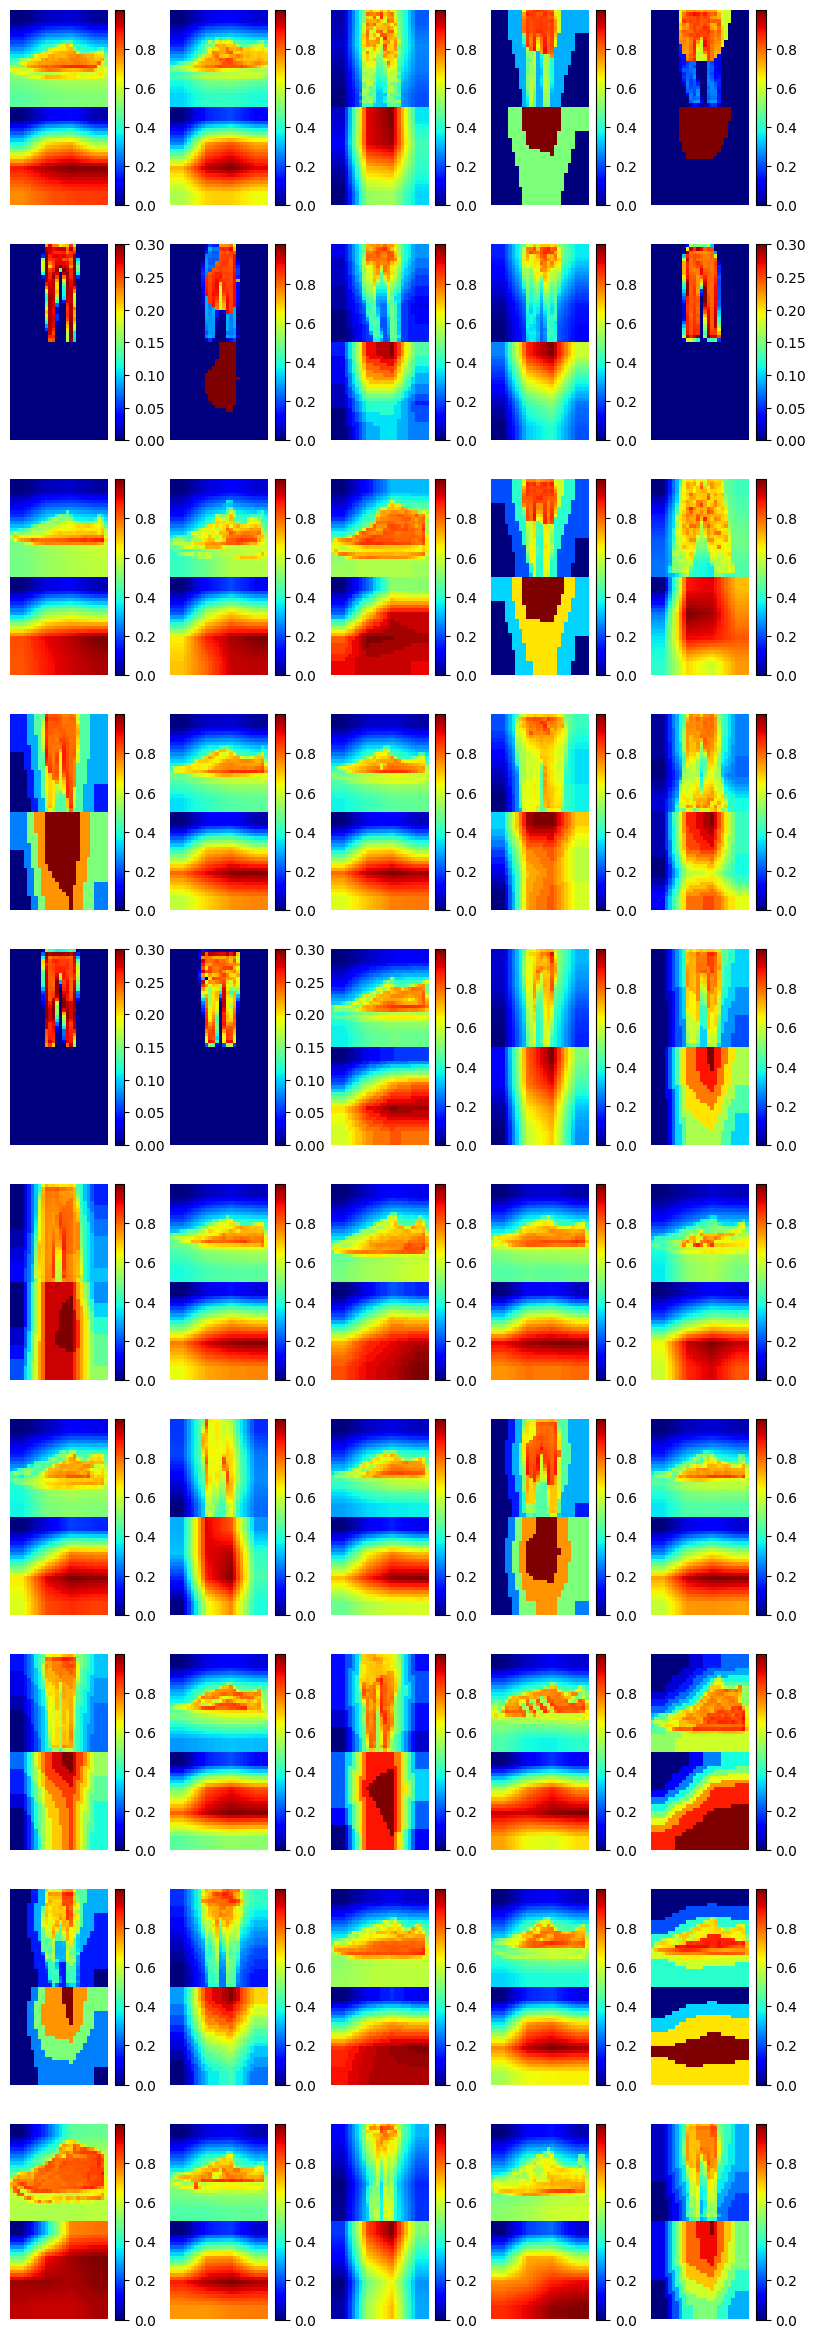

In [17]:
fig = plt.figure(figsize=(10,30))
#plt.subplots_adjust(wspace=-0.1)
for q in range(50):
    fig.add_subplot(10,5,q+1)
    _,out = plot_img(x_test[26+q])
    plt.imshow(out,cmap='jet');
    plt.colorbar();
    #x1= cnn.predict(np.expand_dims(x_test[q],0),verbose=0)
   # plt.title('Prid:'+str(np.argmax(x1))+', True:'+str(y_test[q]))
    plt.axis('off')

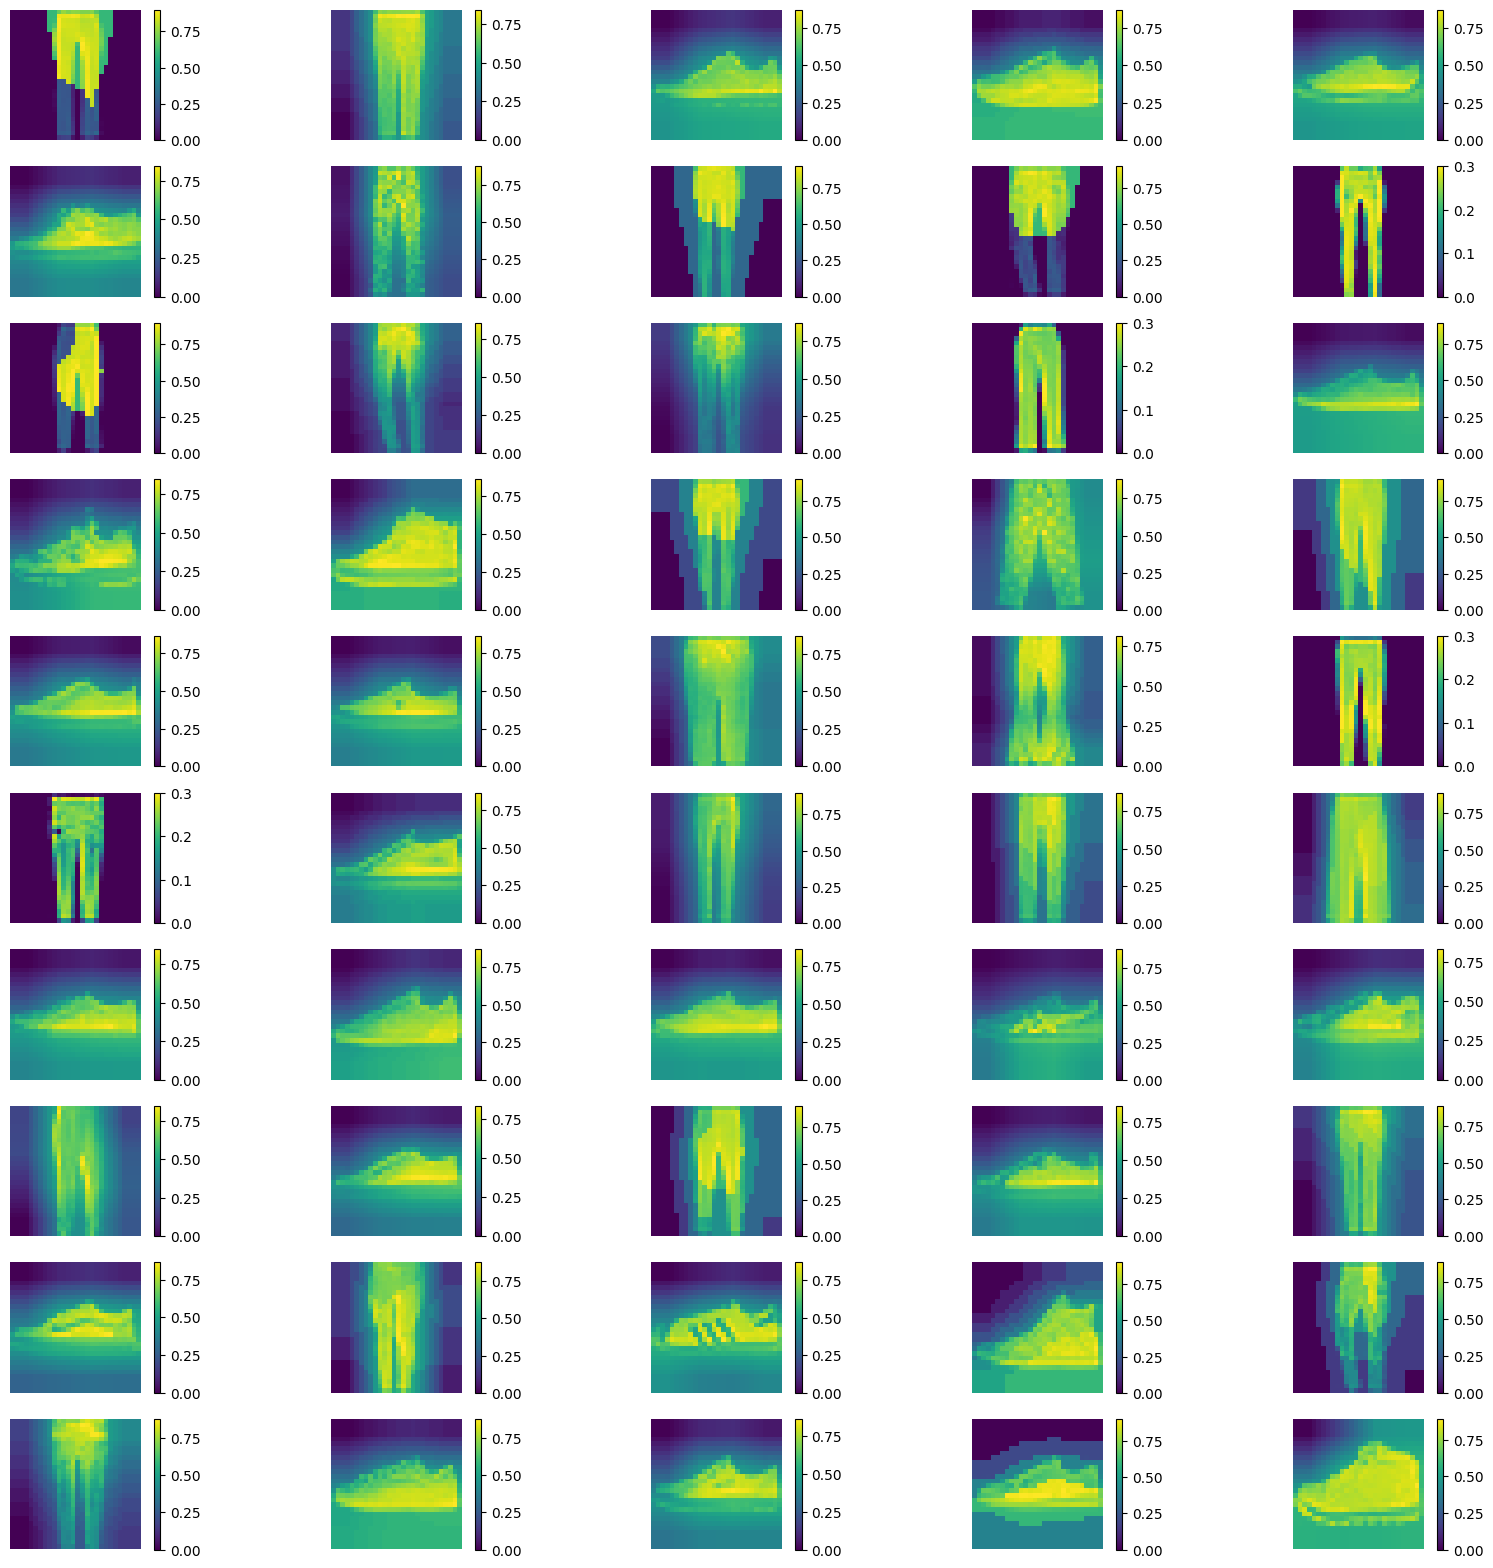

In [19]:
fig = plt.figure(figsize=(20,20))
#plt.subplots_adjust(wspace=-0.1)
for q in range(50):
    fig.add_subplot(10,5,q+1)
    out,_ = plot_img(x_test[22+q])
    plt.imshow(out);
    plt.colorbar();
    #x1= cnn.predict(np.expand_dims(x_test[q],0),verbose=0)
   # plt.title('Prid:'+str(np.argmax(x1))+', True:'+str(y_test[q]))
    plt.axis('off')